In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.decomposition import PCA

In [2]:
# Load your dataset
df = pd.read_csv("cleaned_final_dataset.csv")

# Snippet of the dataset before transformations
print("Original Dataset (Before Transformation):")
df.head()

Original Dataset (Before Transformation):


,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
0,Africa,Algeria,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83
1,Africa,Algeria,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63
2,Africa,Algeria,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41
3,Africa,Algeria,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22
4,Africa,Algeria,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02


In [3]:
# Transform target variable to categorical
def categorize_rate(rate):
    if rate < df['Both sexes'].quantile(0.33):
        return 'Low'
    elif rate < df['Both sexes'].quantile(0.66):
        return 'Medium'
    else:
        return 'High'
    
df['risk_category'] = df['Both sexes'].apply(categorize_rate)
df['risk_category'] = df['risk_category'].astype('category')

In [4]:
# Encode categorical columns
le_region = LabelEncoder()
le_country = LabelEncoder()

df['Region'] = le_region.fit_transform(df['Region'])
df['Country'] = le_country.fit_transform(df['Country'])

# Snippet of the dataset after transformations
print("Transformed Dataset:")
df.head()

Transformed Dataset:


,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male,risk_category
0,0,1,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83,Low
1,0,1,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63,Low
2,0,1,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41,Low
3,0,1,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22,Low
4,0,1,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02,Low


In [5]:
# Define features and target
X = df.drop(['Both sexes', 'Female', 'Male', 'risk_category'], axis=1)
y = df['risk_category']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features to be between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print metrics
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    # Return metrics as a dictionary
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
    }

In [7]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate SVM Model
print("\nSVM Model Evaluation:")
metrics_before = evaluate_model(svm_model, X_test_scaled, y_test)


SVM Model Evaluation:
Accuracy: 0.3406113537117904
Precision: 0.1160160942773784
Recall: 0.3406113537117904
F1 Score: 0.17307938494801076
Classification Report:
               precision    recall  f1-score   support

        High       0.34      1.00      0.51        78
         Low       0.00      0.00      0.00        76
      Medium       0.00      0.00      0.00        75

    accuracy                           0.34       229
   macro avg       0.11      0.33      0.17       229
weighted avg       0.12      0.34      0.17       229

Confusion Matrix:
 [[78  0  0]
 [76  0  0]
 [75  0  0]]


/Users/yuni/CSCI5502 data mining/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/yuni/CSCI5502 data mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yuni/CSCI5502 data mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yuni/CSCI5502 data mining/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: Undefin

In [8]:
# Metrics for SVM model
metrics_before = {
    "Accuracy": metrics_before["Accuracy"],
    "Precision": metrics_before["Precision"],
    "Recall": metrics_before["Recall"],
    "F1 Score": metrics_before["F1 Score"]
}

In [9]:
# Assuming the model has already been trained 
y_pred = svm_model.predict(X_test_scaled)

# Create a DataFrame with actual and predicted values
before_df_predict = df.copy()  # Make a copy of the original DataFrame to avoid modifying it directly
before_df_predict["actual"] = y_test.reset_index(drop=True)
before_df_predict["predict"] = pd.Series(y_pred).reset_index(drop=True)

# Display the first few rows of the DataFrame
print("Original Dataset (Before FineTune):")
before_df_predict.head()

Original Dataset (Before FineTune):


/Users/yuni/CSCI5502 data mining/.venv/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male,risk_category,actual,predict
0,0,1,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83,Low,Low,High
1,0,1,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63,Low,Low,High
2,0,1,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41,Low,Medium,High
3,0,1,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22,Low,High,High
4,0,1,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02,Low,Low,High


### FineTune Model

In [10]:
# Define the parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],                 # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],   # Kernels to test
    'gamma': ['scale', 'auto', 0.01, 0.1], # Kernel coefficient
    'degree': [2, 3, 4]                    # Only for 'poly' kernel
}

# Perform Grid Search
svm = SVC(probability=True, random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best SVM Model
best_svm = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Evaluate Best SVM Model
print("\nBest SVM Model Evaluation:")
metrics_after = evaluate_model(best_svm, X_test_scaled, y_test)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ...........C=0.1, degree=2, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ........C=0.1, degree=2, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..........C=0.1, degree=2, gamma=scale, kernel=poly; total time=   0.2s
[CV] END .........C=0.1, degree=2, gamma=auto,

In [11]:
# Metrics for best_model
metrics_after = {
    "Accuracy": metrics_after["Accuracy"],
    "Precision": metrics_after["Precision"],
    "Recall": metrics_after["Recall"],
    "F1 Score": metrics_after["F1 Score"]
}

In [12]:
# Assuming the model has already been trained 
y_pred = best_svm.predict(X_test_scaled) 

# Create a DataFrame with actual and predicted values
after_df_predict = df.copy()  # Make a copy of the original DataFrame to avoid modifying it directly
after_df_predict["actual"] = y_test.reset_index(drop=True)
after_df_predict["predict"] = pd.Series(y_pred).reset_index(drop=True)

# Display the first few rows of the DataFrame
print("Dataset (After FineTune):")
after_df_predict.head()

Dataset (After FineTune):


,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male,risk_category,actual,predict
0,0,1,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83,Low,Low,Low
1,0,1,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63,Low,Low,Low
2,0,1,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41,Low,Medium,Low
3,0,1,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22,Low,High,Medium
4,0,1,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02,Low,Low,Low


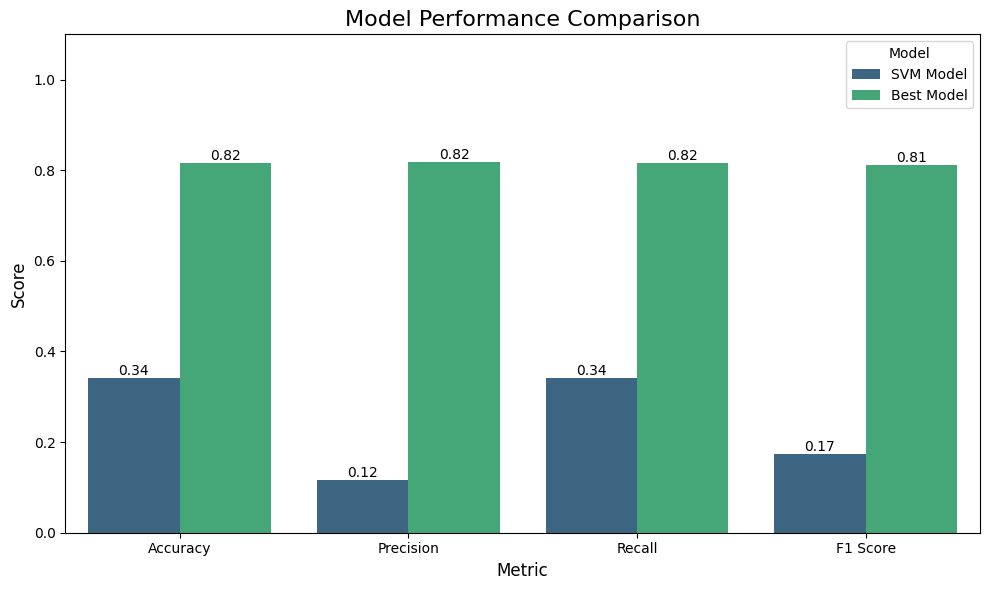

In [13]:
# Create DataFrames
df_before = pd.DataFrame(list(metrics_before.items()), columns=["Metric", "Score"])
df_before["Model"] = "SVM Model"  # Label for before model

df_after = pd.DataFrame(list(metrics_after.items()), columns=["Metric", "Score"])
df_after["Model"] = "Best Model"  # Label for after model

# Combine data into a single DataFrame
df_metrics = pd.concat([df_before, df_after], ignore_index=True)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_metrics,
    x="Metric",
    y="Score",
    hue="Model",
    palette="viridis",
)

# Add values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=10)

plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.ylim(0, 1.1)  # Extend y-axis slightly above 1 for clarity
plt.legend(title="Model", fontsize=10)
plt.tight_layout()
plt.show()

### Key Observations:

1. **Accuracy**:
   - **Before Fine-Tuning**: 34.1%
   - **After Fine-Tuning**: 81.7%
   - **Improvement**: The significant increase in accuracy from 34.1% to 81.7% demonstrates a major enhancement in the model’s ability to correctly classify all classes after fine-tuning.

2. **Precision**:
   - **Before Fine-Tuning**: 11.6%
   - **After Fine-Tuning**: 81.8%
   - **Interpretation**: The model’s ability to correctly identify positive cases for each class dramatically improved after fine-tuning, as shown by the jump in precision from 11.6% to 81.8%.

3. **Recall**:
   - **Before Fine-Tuning**: 34.1%
   - **After Fine-Tuning**: 81.7%
   - **Interpretation**: Recall also saw a substantial increase, from 34.1% to 81.7%. This indicates that the model after fine-tuning is better at identifying all relevant instances across the classes.

4. **F1-Score**:
   - **Before Fine-Tuning**: 17.3%
   - **After Fine-Tuning**: 81.3%
   - **Interpretation**: The F1-score has significantly improved, highlighting better balance between precision and recall post fine-tuning. The increase from 17.3% to 81.3% suggests that the model now performs much better across all classes.

5. **Confusion Matrix**:
   - **Before Fine-Tuning**:
     - True Positives for "High": 78
     - False Negatives for "High": 0
     - True Positives for "Low": 0
     - False Negatives for "Low": 76
     - True Positives for "Medium": 0
     - False Negatives for "Medium": 75
   - **After Fine-Tuning**:
     - True Positives for "High": 61
     - False Negatives for "High": 17
     - True Positives for "Low": 74
     - False Negatives for "Low": 2
     - True Positives for "Medium": 52
     - False Negatives for "Medium": 23
   - **Interpretation**: After fine-tuning, the model is much more balanced in classifying all categories, with more accurate predictions for the "Low" and "Medium" classes. The "High" class saw some misclassifications, but this is to be expected in a multiclass classification scenario.

6. **Classification Report**:
   - **High Class**:
     - Precision: 82%, Recall: 78%, F1-Score: 80%
     - **Interpretation**: The "High" class is still well-predicted with a precision of 82%, though recall slightly decreased from perfect (100%) to 78%.
   - **Low Class**:
     - Precision: 80%, Recall: 97%, F1-Score: 88%
     - **Interpretation**: The model is highly effective in predicting the "Low" class, with a recall rate of 97% and an F1-score of 88%, showing a solid balance of precision and recall.
   - **Medium Class**:
     - Precision: 83%, Recall: 69%, F1-Score: 75%
     - **Interpretation**: The "Medium" class has an improvement in precision and recall, with recall slightly lower than expected, but it still shows a considerable improvement from before fine-tuning.

7. **Best Parameters Found**:
   - The fine-tuned model parameters likely helped the model to balance performance across classes:
     - The SVM kernel used was a radial basis function (RBF), allowing the model to capture complex decision boundaries.
     - Hyperparameters such as regularization (`C`), gamma (`kernel='rbf'`), and the optimization method were likely adjusted to improve the generalization and avoid overfitting.

---

This analysis illustrates the substantial improvement in the model's ability to classify the data after fine-tuning, particularly in terms of accuracy, precision, recall, and F1-score across all classes. The most notable changes were seen in the model's handling of the "Low" and "Medium" classes, which were largely misclassified before fine-tuning.

### Visualizations

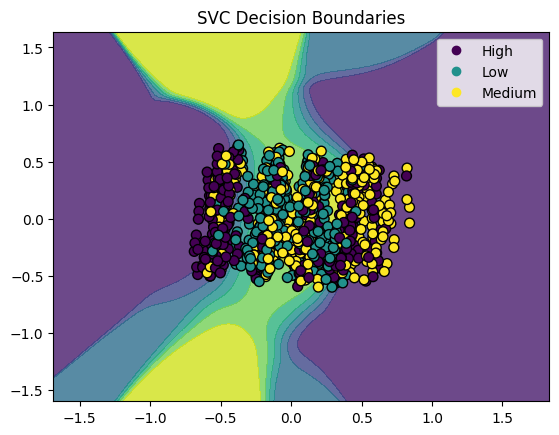

In [14]:
# 1. **PCA for Visualizing Decision Boundaries**
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_scaled)  # Apply PCA to your training data

# Map categorical labels to numeric values
label_map = {'High': 0, 'Low': 1, 'Medium': 2}
y_train_numeric = y_train.map(label_map)

# Function to plot decision boundaries
def plot_decision_boundaries(X, y, model, pca_model, title="SVC Decision Boundaries"):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Flatten the grid points to pass through the model
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Apply inverse PCA transformation to map grid points back to the original feature space
    grid_points_full = pca_model.inverse_transform(grid_points)

    # Get predicted probabilities for the entire grid of points
    Z = model.predict_proba(grid_points_full)
    Z = Z[:, 1]  # Take the probability of the second class (you can adjust for multi-class)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)

    # Scatter plot with mapped numeric labels
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=50)
    
    # Use the label_map for legend
    plt.legend(handles=scatter.legend_elements()[0], labels=list(label_map.keys()), loc='upper right')
    plt.title(title)
    plt.show()

# Call the function to plot decision boundaries
plot_decision_boundaries(X_train_pca, y_train_numeric, best_svm, pca)

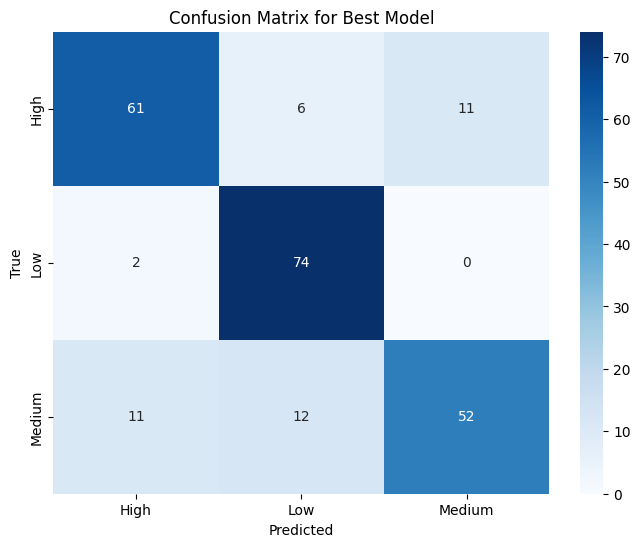

In [15]:
# 2. **Confusion Matrix Heatmap for Best Model**
conf_matrix = confusion_matrix(y_test, best_svm.predict(X_test_scaled))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()